In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, fbeta_score
from sklearn.utils.class_weight import compute_class_weight


In [2]:
X = pd.read_csv(os.path.join('data','train_data.csv'), header=None)
y = pd.read_csv(os.path.join('data','train_labels.csv'), header=None, names=['y'])
y = y['y'].apply(lambda x: 1 if x == -1 else 0)

In [3]:
y.value_counts()

0    3375
1     375
Name: y, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [7]:
X_train.isnull().sum().sum()

0

In [8]:
y_train.isnull().sum()

0

In [9]:
y_train.value_counts()

0    2531
1     281
Name: y, dtype: int64

In [11]:
X_train.duplicated().sum()

0

In [12]:
pca = PCA(n_components=2, whiten=True)

In [13]:
X = StandardScaler().fit_transform(X)

In [14]:
x = pca.fit_transform(X)

C:\Users\Marcin\anaconda3\envs\ml-mw-mm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

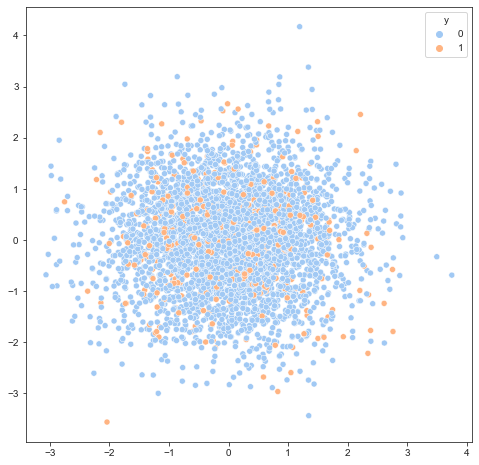

In [15]:
import seaborn as sns
sns.set_palette('pastel')
sns.set_style('ticks')
plt.figure(figsize=(8,8))
sns.scatterplot(x[:,0],
           x[:,1], hue=y)
#sns.stripplot(data=principalDf, x="x1", y="x2",)# hue="target")

In [16]:
import scipy

In [24]:
X_train.skew().describe()

count    10000.000000
mean         0.000423
std          0.046494
min         -0.197924
25%         -0.030701
50%          0.000705
75%          0.031638
max          0.184150
dtype: float64

In [17]:
X_train.skew().idxmin()

9792

In [18]:
X_train[9792]

1936    157.590
478     -63.936
699     179.620
2933    324.518
19     -254.625
         ...   
3004    905.523
2944    351.445
916     -93.194
175     314.709
1997    460.214
Name: 9792, Length: 2812, dtype: float64

<AxesSubplot:xlabel='9792', ylabel='Density'>

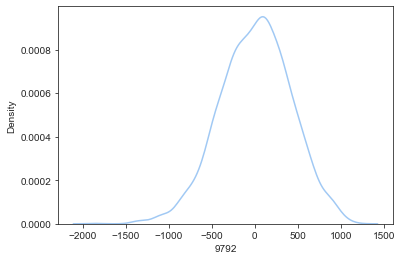

In [19]:
sns.kdeplot(pd.DataFrame(X_train)[9792])
#sns.kdeplot(norm.rvs(size=3000))

In [20]:
X_train.skew().idxmax()

2611

<AxesSubplot:xlabel='2611', ylabel='Density'>

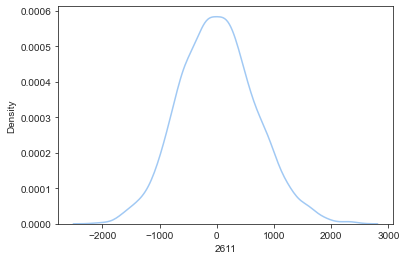

In [21]:
sns.kdeplot(pd.DataFrame(X_train)[2611])

In [32]:
pipe = Pipeline([('pca', PCA(n_components=100, whiten=True)), 
                ('logistic', LogisticRegression(solver='lbfgs', class_weight='balanced'))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=100, whiten=True)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [33]:
y_pred = pipe.predict(X_test)

In [ ]:
y_test.value_counts()

In [34]:
fbeta_score(y_test, y_pred, beta=2)

0.2532561505065123

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       844
           1       0.11      0.37      0.17        94

    accuracy                           0.64       938
   macro avg       0.51      0.52      0.47       938
weighted avg       0.83      0.64      0.71       938



In [ ]:
f1_score(y_test, y_pred)#, average='weighted')

In [ ]:
print(classification_report(y_test, y_pred))

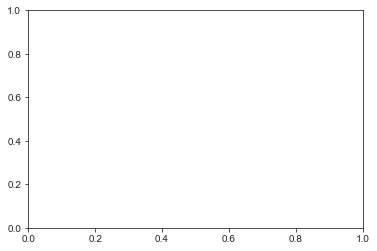

In [27]:
from scipy.stats import skewnorm
from scipy.stats import norm

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
r = skewnorm.rvs(0, size=3000)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
#ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [29]:
def plot_distribution(a=0):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(skewnorm.ppf(0.01, a),
                    skewnorm.ppf(0.99, a), 100)
    ax.plot(x, skewnorm.pdf(x, a),
           'r-', lw=5, alpha=0.6, label='skewnorm pdf')
    #plt.show()
    #return x

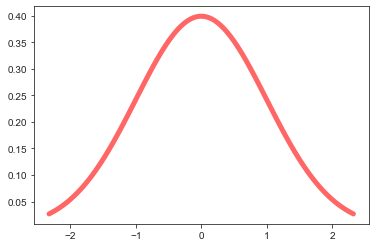

In [30]:
plot_distribution(0)

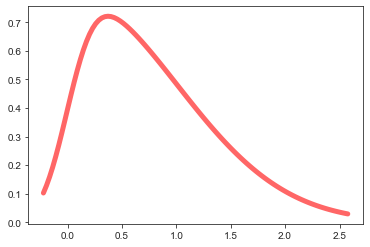

In [31]:
plot_distribution(5)